# Building Your First Neural Network: Universal Approximation (CSC 422)

**Duration:** 30 minutes  
**Format:** Live coding with student participation  
**Course:** CSC 422 - Machine and Deep Learning

---

## Learning Goals

By the end of this session, students will:
- Understand the Universal Approximation Theorem conceptually
- Implement a shallow neural network from scratch using NumPy
- See how adding neurons increases function approximation power
- Connect neural networks to Module 1's gradient descent concepts
- Build foundation for deeper neural network architectures

---

## ⏱Timeline

- **0–5 min** — Hook: The Universal Approximation Magic
- **5–15 min** — Build Neural Network from Scratch
- **15–25 min** — Add Neurons & Watch Approximation Improve
- **25–30 min** — Connect to Gradient Descent & Next Steps

---

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)
print("✅ Ready to build neural networks!")

✅ Ready to build neural networks!


---

# 0–5 min: Hook - The Universal Approximation Magic

**Goal:** Show the amazing end result, then work backwards to understand how

TODAY'S GOAL: Build a neural network that can approximate ANY function!
Universal Approximation Theorem: A neural network with enough neurons
   can approximate any continuous function to arbitrary accuracy.
We'll start simple and add complexity step by step!


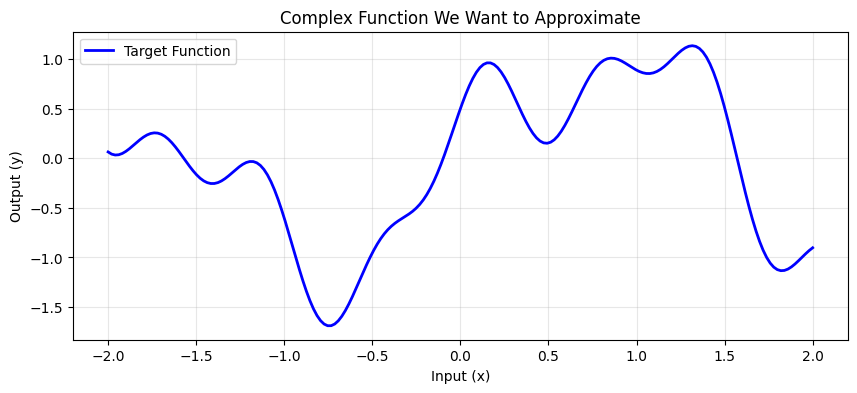

How can we approximate this complex wiggling function?
Answer: Combine simple building blocks (neurons) intelligently!


In [2]:
# The end result we're building towards
print("TODAY'S GOAL: Build a neural network that can approximate ANY function!")
print("Universal Approximation Theorem: A neural network with enough neurons")
print("   can approximate any continuous function to arbitrary accuracy.")
print("We'll start simple and add complexity step by step!")

# Create a complex target function to approximate
def complex_function(x):
    """A complex function we want our neural network to learn"""
    return np.sin(2 * x) + 0.5 * np.cos(5 * x) + 0.3 * np.sin(10 * x)

# Generate data
x_demo = np.linspace(-2, 2, 200)
y_demo = complex_function(x_demo)

plt.figure(figsize=(10, 4))
plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('Complex Function We Want to Approximate')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("How can we approximate this complex wiggling function?")
print("Answer: Combine simple building blocks (neurons) intelligently!")

**Discussion:** *Looking at this complex function, how might you break it down into simpler pieces?*

---

# 5–15 min: Build Neural Network from Scratch

**Goal:** Implement the simplest possible neural network and understand each component

## From Linear Regression to Neural Networks

Remember Module 1? We built: **y = ax + b**

A single neuron is almost the same: **y = σ(wx + b)**

The only difference: **σ** (sigma) - the activation function!

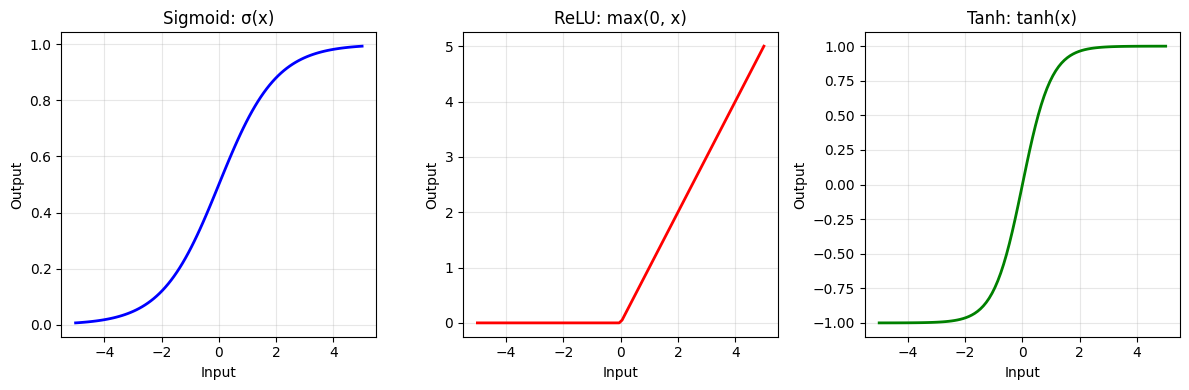

Key insight: Activation functions add non-linearity!
   Without them, neural networks would just be linear regression.


In [3]:
# The key ingredient: Activation Functions
def sigmoid(x):
    """Sigmoid activation: smooth S-curve, outputs between 0 and 1"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def relu(x):
    """ReLU activation: max(0, x) - simple but powerful"""
    return np.maximum(x, 0)

def tanh(x):
    """Tanh activation: outputs between -1 and 1"""
    return np.tanh(x)

# Visualize activation functions
x_act = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x_act, sigmoid(x_act), 'b-', linewidth=2)
plt.title('Sigmoid: σ(x)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(x_act, relu(x_act), 'r-', linewidth=2)
plt.title('ReLU: max(0, x)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(x_act, tanh(x_act), 'g-', linewidth=2)
plt.title('Tanh: tanh(x)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key insight: Activation functions add non-linearity!")
print("   Without them, neural networks would just be linear regression.")

## Build a Single Neuron

Let's implement our first neuron class:

Created neuron: Neuron(w=1.579, b=0.767)


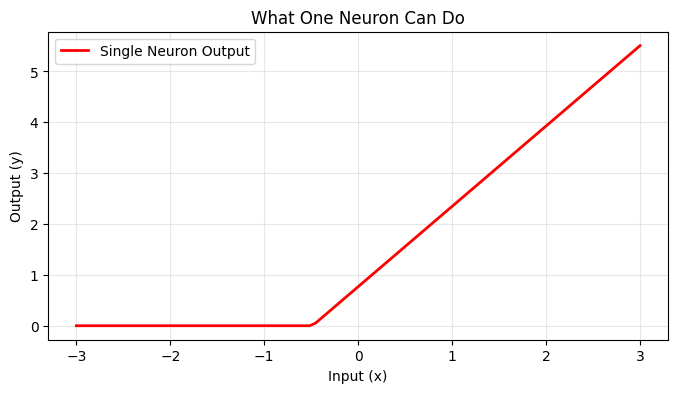

One neuron creates a smooth curve!
   But can it approximate our complex target function? Let's see...


In [7]:
class SingleNeuron:
    """A single neuron: the building block of neural networks"""
    
    def __init__(self, activation='tanh'):
        """Initialize neuron with random weights"""
        # TODO: Initialize weight and bias with random values
        self.weight = np.random.normal(0, 1)  # Random weight
        self.bias = np.random.normal(0, 1)  # Random bias
        
        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'relu':
            self.activation = relu
        else:
            self.activation = tanh
    
    def forward(self, x):
        """Forward pass: compute neuron output"""
        # Step 1: Linear combination (just like Module 1!)
        linear_output = self.weight * x + self.bias  # TODO: Compute w*x + b
        
        # Step 2: Apply activation function (the new part!)
        return self.activation(linear_output)
    
    def __repr__(self):
        return f"Neuron(w={self.weight:.3f}, b={self.bias:.3f})"

# Create and test a single neuron
neuron = SingleNeuron(activation='relu')
print(f"Created neuron: {neuron}")

# Test it on some data
x_test = np.linspace(-3, 3, 100)
y_neuron = neuron.forward(x_test)

plt.figure(figsize=(8, 4))
plt.plot(x_test, y_neuron, 'r-', linewidth=2, label=f'Single Neuron Output')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('What One Neuron Can Do')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"One neuron creates a smooth curve!")
print(f"   But can it approximate our complex target function? Let's see...")

## Test Single Neuron vs. Target Function

In [ ]:
# Compare single neuron to our target function
plt.figure(figsize=(10, 5))
plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target Function', alpha=0.8)
plt.plot(x_demo, neuron.forward(x_demo), 'r--', linewidth=2, label='Single Neuron')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.title('Single Neuron vs. Complex Target Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Observation: One neuron can't capture the complexity!")
print("Solution: Add more neurons and combine their outputs!")

**Discussion:** *What do you think will happen if we add more neurons and combine them?*

---

# 15–25 min: Add Neurons & Watch Approximation Improve

**Goal:** Build a shallow neural network and see the Universal Approximation Theorem in action

## Shallow Neural Network Architecture

A shallow neural network combines multiple neurons:
**y = w₁σ(w₁₁x + b₁) + w₂σ(w₁₂x + b₂) + ... + wₙσ(w₁ₙx + bₙ)**

In [ ]:
class ShallowNeuralNetwork:
    """A shallow neural network with multiple neurons in one hidden layer"""
    
    def __init__(self, num_neurons=3, activation='tanh'):
        """Initialize network with specified number of neurons"""
        self.num_neurons = num_neurons
        
        # Hidden layer weights and biases (input to hidden)
        # TODO: Create arrays of random weights and biases for hidden layer
        self.hidden_weights = _____________
        self.hidden_biases = _____________
        
        # Output layer weights (hidden to output)
        # TODO: Create array of random weights for output layer
        self.output_weights = _____________
        
        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = lambda x: sigmoid(x) * (1 - sigmoid(x))
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = lambda x: (x > 0).astype(float)
        else:
            self.activation = tanh
            self.activation_derivative = lambda x: 1 - np.tanh(x)**2
    
    def forward(self, x):
        """Forward pass through the network"""
        # Step 1: Compute hidden layer outputs
        # Each neuron: σ(w_i * x + b_i)
        hidden_linear = self.hidden_weights[:, np.newaxis] * x + self.hidden_biases[:, np.newaxis]
        hidden_outputs = self.activation(hidden_linear)
        
        # Step 2: Combine hidden outputs with output weights
        # Final output: sum of weighted hidden outputs
        # TODO: Compute final output as weighted sum
        final_output = _____________
        
        return final_output, hidden_outputs, hidden_linear
    
    def predict(self, x):
        """Simple prediction without returning hidden outputs"""
        output, _, _ = self.forward(x)
        return output
    
    def train(self, x_train, y_train, learning_rate=0.01, epochs=1000, verbose=True):
        """Train the network using gradient descent
        
        Args:
            x_train: Training inputs
            y_train: Training targets
            learning_rate: Step size for gradient descent
            epochs: Number of training iterations
            verbose: Whether to print training progress
            
        Returns:
            loss_history: List of loss values during training
        """
        loss_history = []
        
        for epoch in range(epochs):
            # Forward pass
            output, hidden_outputs, hidden_linear = self.forward(x_train)
            
            # Calculate loss (Mean Squared Error)
            # TODO: Compute mean squared error
            loss = _____________
            loss_history.append(loss)
            
            # Backward pass - compute gradients
            # Output layer gradients
            output_error = output - y_train
            # TODO: Compute gradients for output weights
            output_weights_grad = _____________
            
            # Hidden layer gradients (chain rule!)
            hidden_error = output_error[np.newaxis, :] * self.output_weights[:, np.newaxis]
            hidden_activation_grad = self.activation_derivative(hidden_linear)
            # TODO: Compute gradients for hidden weights and biases
            hidden_weights_grad = _____________
            hidden_biases_grad = _____________
            
            # Update parameters using gradient descent
            # TODO: Update all parameters (weights and biases)
            self.output_weights -= _____________
            self.hidden_weights -= _____________
            self.hidden_biases -= _____________
            
            # Print progress
            if verbose and (epoch + 1) % (epochs // 5) == 0:
                print(f"   Epoch {epoch + 1:4d}/{epochs}: Loss = {loss:.6f}")
        
        if verbose:
            print(f"Training complete! Final loss: {loss:.6f}")
        
        return loss_history
    
    def __repr__(self):
        return f"ShallowNN({self.num_neurons} neurons)"

# Test with different numbers of neurons
neuron_counts = [1, 3, 5, 10]
networks = {}

for n in neuron_counts:
    networks[n] = ShallowNeuralNetwork(num_neurons=n, activation='tanh')
    print(f"Created network with {n} neurons")

print("\nNeural networks ready to test!")

## Watch Approximation Power Increase

In [ ]:
# Compare networks with different numbers of neurons
plt.figure(figsize=(15, 10))

for i, n_neurons in enumerate(neuron_counts):
    plt.subplot(2, 2, i+1)
    
    # Get network prediction
    network = networks[n_neurons]
    y_pred = network.predict(x_demo)
    
    # Plot target vs prediction
    plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target Function', alpha=0.8)
    plt.plot(x_demo, y_pred, 'r--', linewidth=2, label=f'Network ({n_neurons} neurons)')
    
    # Calculate and display error
    # TODO: Compute mean squared error
    mse = _____________
    plt.title(f'{n_neurons} Neurons - MSE: {mse:.4f}')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("UNIVERSAL APPROXIMATION IN ACTION:")
print("   → More neurons = better approximation")
print("   → With enough neurons, we can approximate ANY function!")
print("   → This is the theoretical foundation of neural networks")

## The Power of Training: Before vs After

**Goal:** See how training transforms random networks into function approximators!

In [ ]:
# Create training data
x_train = np.linspace(-2, 2, 100)
y_train = complex_function(x_train)

# Compare untrained vs trained networks
plt.figure(figsize=(15, 10))

neuron_counts_train = [3, 5, 10]
for i, n_neurons in enumerate(neuron_counts_train):
    # Create two identical networks
    untrained_network = ShallowNeuralNetwork(num_neurons=n_neurons, activation='tanh')
    trained_network = ShallowNeuralNetwork(num_neurons=n_neurons, activation='tanh')
    
    # Copy weights to make them identical initially
    trained_network.hidden_weights = untrained_network.hidden_weights.copy()
    trained_network.hidden_biases = untrained_network.hidden_biases.copy()
    trained_network.output_weights = untrained_network.output_weights.copy()
    
    # Get untrained prediction
    y_untrained = untrained_network.predict(x_demo)
    
    # Train the network
    print(f"\nTraining {n_neurons}-neuron network...")
    # TODO: Train the network on our data
    loss_history = _____________
    
    # Get trained prediction
    y_trained = trained_network.predict(x_demo)
    
    # Plot results
    plt.subplot(2, 3, i+1)
    plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target', alpha=0.8)
    plt.plot(x_demo, y_untrained, 'r--', linewidth=2, label='Untrained', alpha=0.7)
    plt.title(f'{n_neurons} Neurons - BEFORE Training')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 3, i+4)
    plt.plot(x_demo, y_demo, 'b-', linewidth=2, label='Target', alpha=0.8)
    plt.plot(x_demo, y_trained, 'g-', linewidth=2, label='Trained', alpha=0.8)
    
    # TODO: Calculate final MSE after training
    final_mse = _____________
    plt.title(f'{n_neurons} Neurons - AFTER Training\nMSE: {final_mse:.4f}')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTRAINING RESULTS:")
print("   → Random networks: Poor approximation")
print("   → Trained networks: Excellent approximation!")
print("   → This is the magic of gradient descent!")
print("   → More neurons + training = Universal Approximation!")

## Watch the Learning Process

In [ ]:
# Demonstrate the learning process with different network sizes
plt.figure(figsize=(12, 8))

# Train networks and collect learning curves
learning_curves = {}
final_performances = {}

for n_neurons in [1, 3, 5, 10]:
    print(f"Training {n_neurons}-neuron network...")
    
    # Create and train network
    network = ShallowNeuralNetwork(num_neurons=n_neurons, activation='tanh')
    # TODO: Train the network and collect loss history
    loss_history = _____________
    
    learning_curves[n_neurons] = loss_history
    final_performances[n_neurons] = loss_history[-1]

# Plot learning curves
plt.subplot(2, 2, 1)
for n_neurons, losses in learning_curves.items():
    plt.plot(losses, label=f'{n_neurons} neurons', linewidth=2)
plt.xlabel('Training Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curves: Loss vs Training Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot final performance vs network size
plt.subplot(2, 2, 2)
neurons = list(final_performances.keys())
final_losses = list(final_performances.values())
plt.bar(neurons, final_losses, color=['red', 'orange', 'green', 'blue'], alpha=0.7)
plt.xlabel('Number of Neurons')
plt.ylabel('Final Loss (MSE)')
plt.title('Final Performance vs Network Size')
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Show parameter count vs performance
plt.subplot(2, 2, 3)
param_counts = [2*n + n for n in neurons]  # 2*n weights + n biases
plt.scatter(param_counts, final_losses, c=['red', 'orange', 'green', 'blue'], s=100)
for i, n in enumerate(neurons):
    plt.annotate(f'{n}n', (param_counts[i], final_losses[i]), xytext=(5, 5), 
                textcoords='offset points')
plt.xlabel('Total Parameters')
plt.ylabel('Final Loss (MSE)')
plt.title('Parameters vs Performance')
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Show convergence comparison
plt.subplot(2, 2, 4)
# Plot only the first 200 epochs for clarity
for n_neurons, losses in learning_curves.items():
    epochs_to_show = min(200, len(losses))
    plt.plot(range(epochs_to_show), losses[:epochs_to_show], 
             label=f'{n_neurons} neurons', linewidth=2)
plt.xlabel('Training Epoch (First 200)')
plt.ylabel('Loss (MSE)')
plt.title('Early Training: Convergence Speed')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("LEARNING INSIGHTS:")
print("   More neurons → Lower final loss")
print("   More parameters → Better approximation")
print("   All networks learn, but at different rates")
print("   Diminishing returns: 10 neurons vs 5 neurons")
print("\nKEY TAKEAWAY: Universal Approximation Theorem in action!")
print("   With enough neurons and proper training, we can approximate any function!")

## Visualize Individual Neuron Contributions

In [ ]:
# Show how individual neurons contribute to the final output
network_5 = networks[5]  # Use 5-neuron network
final_output, hidden_outputs, _ = network_5.forward(x_demo)  # Fix: unpack all 3 values

plt.figure(figsize=(12, 8))

# Top plot: Individual neuron outputs
plt.subplot(2, 1, 1)
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i in range(5):
    # TODO: Compute weighted output for each neuron
    weighted_output = _____________
    plt.plot(x_demo, weighted_output, color=colors[i], linewidth=2, 
             label=f'Neuron {i+1} (w={network_5.output_weights[i]:.2f})', alpha=0.7)

plt.title('Individual Weighted Neuron Contributions')
plt.xlabel('Input (x)')
plt.ylabel('Neuron Output')
plt.legend()
plt.grid(True, alpha=0.3)

# Bottom plot: Sum of all neurons vs target
plt.subplot(2, 1, 2)
plt.plot(x_demo, y_demo, 'b-', linewidth=3, label='Target Function')
plt.plot(x_demo, final_output, 'r--', linewidth=2, label='Sum of All Neurons')
plt.title('Final Network Output (Sum of Individual Contributions)')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insight: Neural networks work by combining simple building blocks!")
print("   Each neuron captures a different 'feature' of the target function.")
print("   The final output is just a weighted sum of these features.")

**Discussion:** *How is this similar to building with LEGO blocks? What happens if we want even more accuracy?*

## Parameter Scaling Demonstration

In [ ]:
# Show how parameter count scales with neurons
def count_parameters(num_neurons):
    """Count total parameters in our shallow network"""
    # TODO: Calculate total number of parameters
    # Hidden layer: weights + biases
    # Output layer: weights
    hidden_params = _____________  # weights + biases for hidden layer
    output_params = _____________  # output weights
    return hidden_params + output_params

# Calculate parameters for different network sizes
neuron_range = np.arange(1, 21)
param_counts = [count_parameters(n) for n in neuron_range]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(neuron_range, param_counts, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Number of Neurons')
plt.ylabel('Total Parameters')
plt.title('Parameter Count vs. Network Size')
plt.grid(True, alpha=0.3)

# Show approximation quality vs parameters
plt.subplot(1, 2, 2)
test_neurons = [1, 3, 5, 10, 15]
mse_scores = []

for n in test_neurons:
    net = ShallowNeuralNetwork(num_neurons=n, activation='tanh')
    pred = net.predict(x_demo)
    mse = np.mean((y_demo - pred)**2)
    mse_scores.append(mse)

plt.plot([count_parameters(n) for n in test_neurons], mse_scores, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Number of Parameters')
plt.ylabel('Mean Squared Error')
plt.title('Approximation Quality vs. Parameters')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("PARAMETER SCALING INSIGHTS:")
print(f"   • 1 neuron:  {count_parameters(1)} parameters")
print(f"   • 10 neurons: {count_parameters(10)} parameters")
print(f"   • 100 neurons: {count_parameters(100)} parameters")
print("   • More parameters = more flexibility = better approximation")
print("   • Modern neural networks have MILLIONS or BILLIONS of parameters!")

---

# 25–30 min: Connect to Gradient Descent & Next Steps

**Goal:** Bridge today's implementation to Module 1 concepts and preview what's coming

## The Optimization Challenge

In [ ]:
# Connect to Module 1: Same optimization, more parameters
print("CONNECTION TO MODULE 1:")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Linear Regression (Module 1):")
print("   • Function: y = ax + b")
print("   • Parameters: 2 (a, b)")
print("   • Optimization: Gradient descent")
print("")
print("Neural Network (Today):")
print("   • Function: y = Σ wᵢσ(wᵢᵢx + bᵢ)")
print(f"   • Parameters: {count_parameters(5)} (for 5 neurons)")
print("   • Optimization: SAME gradient descent!")
print("")
print("Key insight: Neural networks are just more complex functions")
print("   that we optimize using the same mathematical principles!")

# Show parameter landscape visualization
print("\nOPTIMIZATION LANDSCAPE:")
print("   • Linear regression: 2D parameter space (easy to visualize)")
print("   • Neural networks: High-dimensional space (harder but same idea)")
print("   • Gradient descent: Still walks downhill to find minimum!")

## What's Coming Next

In [ ]:
# Preview upcoming neural network topics
print("COMING SOON IN MODULE 2:")
print("═══════════════════════════════")
print("Backpropagation:")
print("   • How to efficiently compute gradients for ALL parameters")
print("   • The algorithm that makes neural network training practical")
print("")
print("Deep Networks:")
print("   • Multiple hidden layers: shallow → deep")
print("   • Why depth matters for complex problems")
print("")
print("Real Applications:")
print("   • Image classification")
print("   • Natural language processing")
print("   • Game playing (like AlphaGo)")
print("")
print("Practical Tools:")
print("   • PyTorch and TensorFlow")
print("   • GPU acceleration")
print("   • Best practices for training")
print("")
print("Remember: Today's simple network is the foundation for ALL of this!")

## Key Takeaways & Skills Checklist

In [ ]:
print("=== TODAY'S NEURAL NETWORK SKILLS ===")
print("✓ Universal Approximation Theorem - understand the theory")
print("✓ Activation functions - the source of non-linearity")
print("✓ Shallow network implementation - from scratch with NumPy")
print("✓ Parameter scaling - more neurons = more approximation power")
print("✓ Function decomposition - complex functions from simple parts")
print("✓ Connection to optimization - same gradient descent principles")
print("")
print("YOU NOW UNDERSTAND:")
print("   • Why neural networks are powerful (Universal Approximation)")
print("   • How they work internally (weighted combinations of neurons)")
print("   • Why we need many parameters (flexibility for complex functions)")
print("   • How they connect to classical ML (gradient descent optimization)")
print("")
print("READY FOR: Backpropagation, deep networks, and real applications!")

## Mini Challenge (Your Turn!)

In [ ]:
# Challenge: Try different activation functions and see the effect
print("YOUR TURN - MINI CHALLENGE:")
print("Try creating networks with different activation functions")
print("and see how they affect the approximation quality!")
print("")
print("Experiment with:")
print("• sigmoid vs tanh vs relu")
print("• Different numbers of neurons")
print("• Different target functions")
print("")
print("Which combination works best for different types of functions?")

# TODO: Create and test different networks
# Example:
# relu_network = ShallowNeuralNetwork(num_neurons=5, activation='relu')
# sigmoid_network = ShallowNeuralNetwork(num_neurons=5, activation='sigmoid')
# Compare their outputs!

# YOUR CODE HERE:

---

# Extension: Multi-Input, Multi-Output Networks

**Goal:** Build realistic neural networks that handle multiple inputs and outputs

## From 1D to Multi-Dimensional

Real neural networks typically have:
- **Multiple inputs**: Features like age, income, temperature, pixel values
- **Multiple outputs**: Classifications, predictions, or multi-task objectives

**Architecture:** 2 inputs → 3 hidden neurons → 2 outputs

In [ ]:
class MultiInputOutputNetwork:
    """A shallow neural network with multiple inputs and outputs"""
    
    def __init__(self, input_size=2, hidden_size=3, output_size=2, activation='tanh'):
        """Initialize network with specified architecture"""
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Hidden layer: input_size → hidden_size
        # Each hidden neuron connects to ALL inputs
        # TODO: Create weight matrix and bias vector for hidden layer
        self.W1 = _____________  # Shape: (hidden_size, input_size)
        self.b1 = _____________  # Shape: (hidden_size, 1)
        
        # Output layer: hidden_size → output_size
        # Each output connects to ALL hidden neurons
        # TODO: Create weight matrix and bias vector for output layer
        self.W2 = _____________  # Shape: (output_size, hidden_size)
        self.b2 = _____________  # Shape: (output_size, 1)
        
        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'relu':
            self.activation = relu
        else:
            self.activation = tanh
    
    def forward(self, X):
        """Forward pass through the network
        
        Args:
            X: Input matrix of shape (input_size, num_samples)
        
        Returns:
            output: Network output of shape (output_size, num_samples)
            hidden: Hidden activations of shape (hidden_size, num_samples)
        """
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Hidden layer: Z1 = W1 @ X + b1, A1 = σ(Z1)
        # TODO: Compute hidden layer linear combination
        Z1 = _____________
        A1 = self.activation(Z1)
        
        # Output layer: Z2 = W2 @ A1 + b2
        # TODO: Compute output layer linear combination
        Z2 = _____________
        
        return Z2, A1
    
    def predict(self, X):
        """Simple prediction interface"""
        output, _ = self.forward(X)
        return output
    
    def count_parameters(self):
        """Count total number of trainable parameters"""
        # TODO: Calculate total parameters
        w1_params = _____________
        w2_params = _____________
        return w1_params + w2_params
    
    def __repr__(self):
        return f"MultiNN({self.input_size}→{self.hidden_size}→{self.output_size})"

# Create our 2→3→2 network (will work once TODOs are completed)
# multi_network = MultiInputOutputNetwork(input_size=2, hidden_size=3, output_size=2)
# print(f"Created network: {multi_network}")
print("Complete the TODOs above to create the multi-input/output network!")

## Your Challenge: Real-World Applications

**Your Task:** Think about how our 2→3→2 network maps to real-world problems!

In [ ]:
# Real-world application examples
print("REAL-WORLD APPLICATIONS:")
print("Our 2→3→2 network architecture appears everywhere in practice!")
print("")

# TODO: Complete these application examples
applications = [
    {
        'domain': 'Medical Diagnosis',
        'inputs': ['Blood Pressure', '_____________'],  # TODO: Add second input
        'outputs': ['_____________', 'Treatment Urgency'],  # TODO: Add first output
        'hidden': 'Patient Health Patterns'
    },
    {
        'domain': 'Stock Trading',
        'inputs': ['_____________', 'Volume'],  # TODO: Add first input
        'outputs': ['Buy Signal', '_____________'],  # TODO: Add second output
        'hidden': 'Market Trend Features'
    },
    {
        'domain': 'Weather Prediction',
        'inputs': ['Temperature', '_____________'],  # TODO: Add second input
        'outputs': ['_____________', 'Wind Speed'],  # TODO: Add first output
        'hidden': 'Climate Dynamics'
    }
]

for i, app in enumerate(applications, 1):
    print(f"{i}. {app['domain']}:")
    print(f"   Inputs: {', '.join(app['inputs'])}")
    print(f"   Hidden: {app['hidden']}")
    print(f"   Outputs: {', '.join(app['outputs'])}")
    print()

print("YOUR TURN:")
print("Think of your own 2-input, 2-output application!")
print("What problem could you solve with this architecture?")

# TODO: Create your own application example
my_application = {
    'domain': '_____________',  # Your application domain
    'inputs': ['_____________', '_____________'],  # Your two inputs
    'outputs': ['_____________', '_____________'],  # Your two outputs
    'description': '_____________'  # Brief description
}

print(f"\nYOUR APPLICATION:")
print(f"Domain: {my_application['domain']}")
print(f"Inputs: {', '.join(my_application['inputs'])}")
print(f"Outputs: {', '.join(my_application['outputs'])}")
print(f"Description: {my_application['description']}")

print("\nKEY INSIGHTS:")
print("✓ Neural networks scale from simple demos to real applications")
print("✓ Same mathematical principles work across all domains")
print("✓ Matrix operations enable efficient computation")
print("✓ Understanding fundamentals prepares you for any framework")